## 2.1 Data

In [965]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_digits

(1797, 64)


<Figure size 432x288 with 0 Axes>

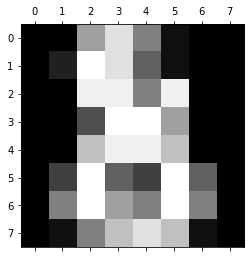

In [966]:
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[1796])
plt.show()

In [967]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [968]:
# input_target = []
# for i in range(0,1797):
#     input_target.append((digits.images[i],digits.target[i]))

In [969]:
inputs = np.array(digits.images)
targets = np.array(digits.target)

<Figure size 432x288 with 0 Axes>

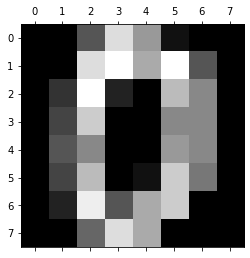

In [970]:
plt.gray()
plt.matshow(inputs[0])
plt.show()

In [971]:
reshaped_inputs = inputs.reshape(1797,64)

In [972]:
reshaped_inputs_f32 = reshaped_inputs.astype('float32')/16

In [973]:
target_array = np.zeros((1797,10))
for i in range(1797):
    target_array[i][targets[i]]=1
target_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [974]:
targets

array([0, 1, 2, ..., 8, 9, 8])

In [975]:
input_target = []
for i in range(len(reshaped_inputs_f32)):
    input_target.append((reshaped_inputs_f32[i],target_array[i]))

In [976]:
mini_batch_size = 1500
number_of_layers_in_mlp = 3
activation_functions_list = ['sigmoid','sigmoid','softmax']
each_layer_perceptron_list = [mini_batch_size,500,10]

In [977]:
def generate_minibatch(input_target=input_target):
    random.shuffle(input_target)
    inputs = []
    targets = []
    for i in range(len(input_target)):
        inputs.append(input_target[i][0])
        targets.append(input_target[i][1])
    inputs_cp = inputs.copy()
    targets_cp = targets.copy()
    minibatch_input = np.array(inputs_cp[:mini_batch_size])
    minibatch_target = np.array(targets_cp[:mini_batch_size])
    
    del inputs_cp[0:mini_batch_size]
    del targets_cp[0:mini_batch_size]
    
    yield (minibatch_input,minibatch_target)

In [978]:
mini_input, mini_target = next(generate_minibatch())

initial_input_size = mini_input.shape[1]

## 2.2 & 2.3 Sigmoid Function and Softmax Function

In [979]:
class activation_functions:

    def sigmoid(X):
        return 1 / (1+np.exp(-X))

    def softmax(Z):
        return np.exp(Z) / np.sum(np.exp(Z))

## 2.4 MLP weights

In [980]:
forward_weights = []
forward_biases = []
forward_activated_values = []
forward_preactivated_values = []

class mlp_forward_layer:
    def __init__(self, activation_function, layer_size, input_size):
        self.activation_function = activation_function
        self.layer_size = layer_size
        self.input_size = input_size
        
    def attributes(self):
        W=np.random.normal(0,0.2,size=(self.layer_size, self.input_size))
        forward_weights.append(W)
        b=np.zeros(shape=(self.layer_size,1))
        forward_biases.append(b)
        return W,b

    def forward_function(self, X, W, b, i):
        if W == -1 or b == -1:
            W,b = self.attributes()
        else:
            W = W[i]
            b = b[i]
        
        Z = W.dot(X) + b
        
        forward_preactivated_values.append(X)
        if((self.activation_function == 'sigmoid') or (self.activation_function == 'Sigmoid')):
            activation_values = activation_functions.sigmoid(Z)
        elif((self.activation_function == 'softmax') or (self.activation_function == 'Softmax')):
            activation_values = activation_functions.softmax(Z)
        forward_activated_values.append(activation_values)
        return np.array(activation_values)

## 2.5 Putting together the MLP 

In [981]:
outputs_list = []
input_size_list = []

class mlp_forward:

    def __init__(self, no_of_layers, size_of_layer, layer_activation_function_string_list):
        self.no_of_layers = no_of_layers
        self.size_of_layer = size_of_layer
        self.layer_activation_function_string_list = layer_activation_function_string_list
        
    def mlp_forward_final_calculation(self, X, W = -1, b = -1, initial_input_size = initial_input_size):
        outputs_list.append(X)
        input_size_list.append(initial_input_size)
        for i in range(self.no_of_layers):
            size_value = int(input_size_list[-1])
            mlp_layer_i_output = mlp_forward_layer(self.layer_activation_function_string_list[i], self.size_of_layer[i], size_value).forward_function(np.array(outputs_list[-1]),W,b,i)
            outputs_list.append(mlp_layer_i_output)
            input_size_list.append(mlp_layer_i_output.shape[0])
        return outputs_list[-1].T

## 2.6 CCE Loss Function

In [982]:
class loss_function:

    def cce_loss(actual_output,predicted_output):
        return ((-1/mini_batch_size)*np.sum(actual_output*(np.log(predicted_output))))


In [983]:
predicted_output = mlp_forward(number_of_layers_in_mlp,each_layer_perceptron_list,activation_functions_list).mlp_forward_final_calculation(mini_input.T)
loss_function.cce_loss(mini_target,predicted_output)

12.549728799839125

In [984]:
mini_target.shape

(1500, 10)

In [985]:
forward_activated_values[-2].shape

(500, 1500)

## 3.1, 3.2 & 3.3 CCE, Sigmoid and Weights Backwards

In [986]:
class backward_functions:

    def cce_deriv(actual_output,predicted_output):
        print(actual_output.shape, predicted_output.shape)
        return predicted_output - actual_output

    def sigmoid_deriv(Z):
        return activation_functions.sigmoid(Z)*(1-activation_functions.sigmoid(Z))
    
    def weights_backwards(current_layer_deriv_input,previous_layer_activated_data):
        print('Weight backwards',current_layer_deriv_input.shape,previous_layer_activated_data.shape)
        return (1/mini_batch_size)*(previous_layer_activated_data*(current_layer_deriv_input.T))
    
    def bias_backwards(current_layer_deriv_input):
        print(np.sum(current_layer_deriv_input))
        return (1/mini_batch_size)*np.sum(current_layer_deriv_input)

    def sigmoid_backwards(current_layer_weights,previous_layer_deriv_input,current_layer_preactivation_data):
        print('Sigmoid backwards',current_layer_weights.shape,previous_layer_deriv_input.shape,current_layer_preactivation_data.shape)
        return (current_layer_weights.dot(backward_functions.sigmoid_deriv(current_layer_preactivation_data.dot(previous_layer_deriv_input))))

    def update_parameters(W,dW,b,db,alpha=0.001):
        print(W.shape,dW.shape,b.shape,db.shape)
        return (W - (alpha*dW)),(b - (alpha*db))
    
    def get_predictions(A2):
        return np.argmax(A2, 0)

    def get_accuracy(predictions, Y):
        print(predictions, Y)
        return np.sum(predictions == Y) / Y.size

In [987]:
backwards_weights = []
backwards_biases = []
backwards_deriv_values = []

class mlp_backward_layer:

    def __init__(self,X,Y,forward_weights=forward_weights,forward_biases=forward_biases,forward_activated_values=forward_activated_values):
        self.X = X
        self.Y = Y
        self.forward_weights = forward_weights
        self.forward_biases = forward_biases
        self.forward_activated_values = forward_activated_values
    
    def feed_backward_function(self):
        for i in range(number_of_layers_in_mlp):
            if i==0 and activation_functions_list[-1].lower()=='softmax':
                predicted_output = mlp_forward(number_of_layers_in_mlp,each_layer_perceptron_list,activation_functions_list).mlp_forward_final_calculation(mini_input.T)
                backwards_deriv_values.append(backward_functions.cce_deriv(self.Y,predicted_output))
                dW = backward_functions.weights_backwards(backwards_deriv_values[-1],forward_activated_values[-(i+1)])
                db = backward_functions.bias_backwards(backwards_deriv_values[-1])
                print(dW.shape,db.shape)
                updated_W, updated_b = backward_functions.update_parameters(forward_weights[(-(i+1))],dW,forward_biases[(-(i+1))],db)
                backwards_weights.append(updated_W)
                backwards_biases.append(updated_b)
                
            elif i>0 and activation_functions_list[-(i+1)].lower()=='sigmoid':
                backwards_deriv_values.append(backward_functions.sigmoid_backwards(forward_weights[-(i+1)],backwards_deriv_values[-1],forward_preactivated_values[-(i+1)]))
                dW = backward_functions.weights_backwards(backwards_deriv_values[-1],forward_activated_values[-(i+1)])
                db = backward_functions.bias_backwards(backwards_deriv_values[-1])
                updated_W, updated_b = backward_functions.update_parameters(forward_weights[(-(i+1))],dW,forward_biases[(-(i+1))],db)
                backwards_weights.append(updated_W)
                backwards_biases.append(updated_b)
            
            else:
                print('Please try again')
                break

In [988]:
def gradient_descent(X, Y, alpha = 0.001, iterations = 100):
    for i in range(iterations):
        if i==0:
            predicted_output = mlp_forward(number_of_layers_in_mlp,each_layer_perceptron_list,activation_functions_list).mlp_forward_final_calculation(mini_input.T)
        else:
            predicted_output = mlp_forward(number_of_layers_in_mlp,each_layer_perceptron_list,activation_functions_list).mlp_forward_final_calculation(mini_input.T, current_W, current_b)
        mlp_backward_layer(mini_input, mini_target).feed_backward_function()
        current_W, current_b = backwards_weights[-number_of_layers_in_mlp:][::-1], backwards_biases[-number_of_layers_in_mlp:][::-1]
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(predicted_output)
            print(get_accuracy(predicted_output, Y))
    return (current_W, current_b)

In [989]:
W1, b1 = gradient_descent(mini_input, mini_target, 0.010, 100)

(1500, 10) (1500, 10)
Weight backwards (1500, 10) (10, 1500)
-1499.0
(10, 1500) ()
(10, 500) (10, 1500) (10, 1) ()


ValueError: operands could not be broadcast together with shapes (10,500) (10,1500) 

In [990]:
len(forward_biases)

9